In [ ]:
#mount google drive when on google colaboratory

from google.colab import drive
drive.mount('/content/drive')

#set repo path and check repo status
repo_path = '/content/drive/MyDrive/geomsha/'
%cd /content/drive/MyDrive/geomsha/
!git status

In [1]:
#initialize environment, load modules/libraries

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#import python code from seperate files
from geomgen.generators import gen_shapes, gen_noise, gen_image, gen_details
from geomgen.helpers import gen_grid_image, show_grid_image

rnd=np.random.default_rng(100)

In [2]:
#Create image with shapes and noise

num_shapes=40
max_radius=1/20
min_radius=1/40

num_noise=400
max_line=1/20
min_line=1/80

im_size=320
max_lw=0.15
min_lw=0.1

shapes = gen_shapes(rnd, num_shapes, max_radius, min_radius, False, False)
noise = gen_noise(rnd, num_noise, max_line, min_line)
img, sha, nse = gen_image(shapes, noise, rnd, im_size, max_lw, min_lw, False)

plt.close()

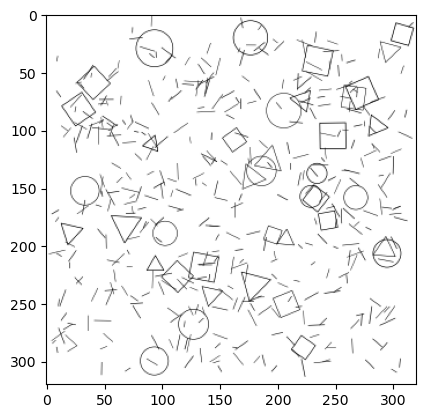

In [3]:
#Show ndarray as image

fig = plt.figure(figsize=(1,1),dpi=len(img))
fig.figimage(img, cmap='gray')
fig.savefig('data/tmp_image.png')
plt.close()

plt.imshow(mpimg.imread('data/tmp_image.png'))

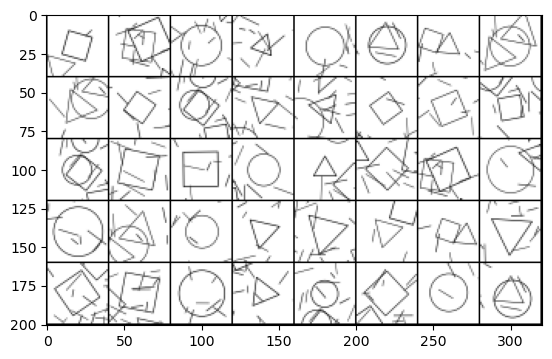

In [4]:
#Show image details with focus on shapes

radius = int(max_radius*im_size)+1
shapes_im_size = 2*radius+5

shapes_img = gen_details(shapes_im_size,sha,img)

grid = (5,8)
grid_pos = show_grid_image(shapes_img, grid,'data/tmp_grid.png')    